In [1]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
from keras.preprocessing.image import ImageDataGenerator

gen = ImageDataGenerator()
train_im = ImageDataGenerator(
               rescale=1./255,
               shear_range=0.2,
               horizontal_flip=False)
def train_images():
    train_generator = train_im.flow_from_directory (
            'Path to the folder containing image folders', 
             target_size=(224, 224),
             color_mode='rgb',
             batch_size=100,
             shuffle = True,
             class_mode='categorical')
    x =  train_generator
    return x[0][0], x[0][1]  

Using TensorFlow backend.


In [2]:
# Import all the required Libraries
import tensorflow
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Dense, Conv2D, Dropout, BatchNormalization, Input, Reshape, Flatten, Deconvolution2D, Conv2DTranspose, MaxPooling2D, UpSampling2D
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import adam

In [3]:
#ENCODER
inp = Input((28, 28,1))
e = Conv2D(32, (3, 3), activation='relu')(inp)
e = MaxPooling2D((2, 2))(e)
e = Conv2D(64, (3, 3), activation='relu')(e)
e = MaxPooling2D((2, 2))(e)
e = Conv2D(64, (3, 3), activation='relu')(e)
l = Flatten()(e)
l = Dense(49, activation='softmax')(l)

In [4]:
#DECODER
d = Reshape((7,7,1))(l)
d = Conv2DTranspose(64,(3, 3), strides=2, activation='relu', padding='same')(d)
d = BatchNormalization()(d)
d = Conv2DTranspose(64,(3, 3), strides=2, activation='relu', padding='same')(d)
d = BatchNormalization()(d)
d = Conv2DTranspose(32,(3, 3), activation='relu', padding='same')(d)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(d)
ae = Model(inp, decoded)
ae.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0   

In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [6]:
# compile it using adam optimizer
ae.compile(optimizer="adam", loss="mse")
#Train it by providing training images
ae.fit(train_images, train_images, epochs=2)


Epoch 1/2
60000/60000 [==============================] - 370s 6ms/step - loss: 0.0160
Epoch 2/2
60000/60000 [==============================] - 367s 6ms/step - loss: 0.0093


60000/60000 [==============================] - 280s 5ms/step


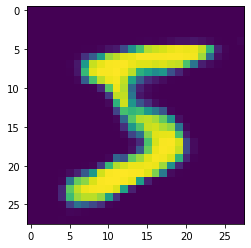

In [7]:
prediction = ae.predict(train_images, verbose=1, batch_size=100)
# you can now display an image to see it is reconstructed well
x =prediction[0].reshape(28,28)
plt.imshow(x)